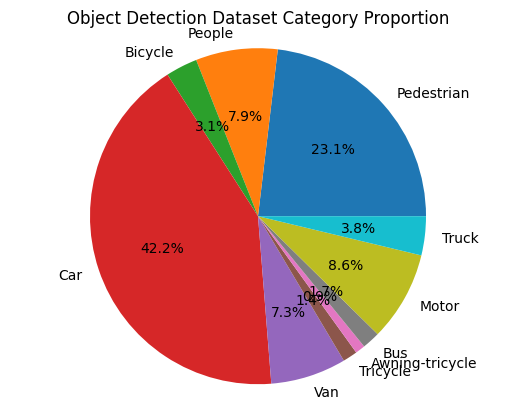

In [8]:
import matplotlib.pyplot as plt

labels = ['Pedestrian', 'People', 'Bicycle', 'Car', 'Van', 
        'Tricycle', 'Awning-tricycle', 'Bus', 'Motor', 'Truck']
sizes = [79337, 27059, 10480, 144866, 24956, 4812, 3246, 5926, 29647, 12875]
name = 'tab20'
plt.get_cmap(name)
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Object Detection Dataset Category Proportion")
plt.axis('equal')
plt.show()

# 网格线的设置

In [35]:

plt.style.use('default')

custom_style = {
    #? 1 画布 和 子图的背景为白色
    'axes.facecolor': 'white', 
    'figure.facecolor': 'white', 

    
    'axes.grid': True,
    'grid.color': 'gray', # 网格线颜色
    
    'grid.linestyle': '--',
    'grid.linewidth': 1.0
}

plt.style.use([custom_style])

## 2.折线图

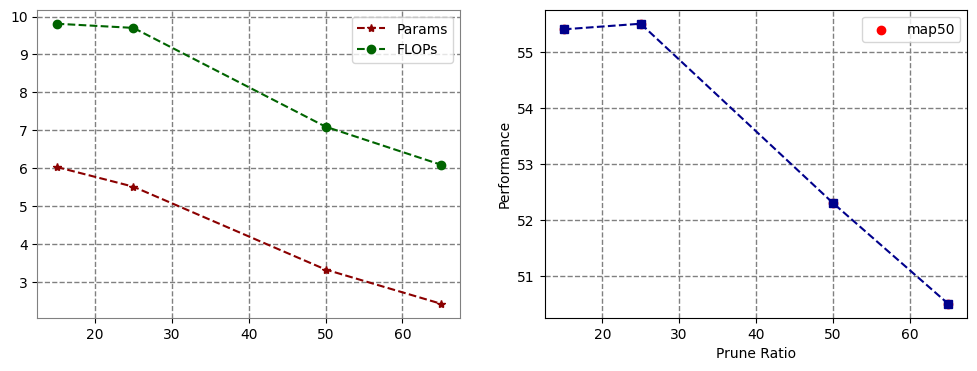

In [46]:
import matplotlib.pyplot as plt

prune_ratios = [15, 25, 50, 65]
map50 = [55.4, 55.5, 52.3, 50.5]
params = [6.04, 5.52, 3.34, 2.44] 
flops = [9.81, 9.70, 7.10, 6.1]
fps = [214, 215, 278, 306]

labels = [ 'Params', 'FLOPs']
fig = plt.figure(figsize=(12,4)) # ! 一张画布
ax1 = fig.add_subplot(1,2,1) 
ax2 = fig.add_subplot(1,2,2) 

plt.scatter(prune_ratios, map50, c='r', label='mAP50')
# plt.scatter(prune_ratios, params, c='g', linestyle='--') 
# plt.scatter(prune_ratios, flops, c='b',  linestyle='-.')
ax1.plot(prune_ratios, params, marker='*', c='darkred', linestyle='--')
ax1.plot(prune_ratios, flops,  marker='o',c='darkgreen', linestyle='--')
ax2.plot(prune_ratios, map50,  marker='s',c='darkblue', linestyle='--')

ax1.spines['bottom'].set_color('gray')
ax1.spines['left'].set_color('gray')
ax1.spines['right'].set_color('gray')
ax1.spines['top'].set_color('gray')
# ax1.tick_params(axis='x', colors='gray')
# ax1.tick_params(axis='y', colors='gray')

plt.xlabel('Prune Ratio')
plt.ylabel('Performance')

# 
#? 1. 图例在图表的内部
ax1.legend(labels, loc='upper right')
ax2.legend(['map50'], loc='upper right')
#! 2.为了实现图例在图标的外部 该怎么做呢？
# plt.legend(labels, bbox_to_anchor=(0.5, 1.01), loc='lower center', fontsize=10)
# plt.show()
plt.savefig('exps-pruning.svg', dpi=300)

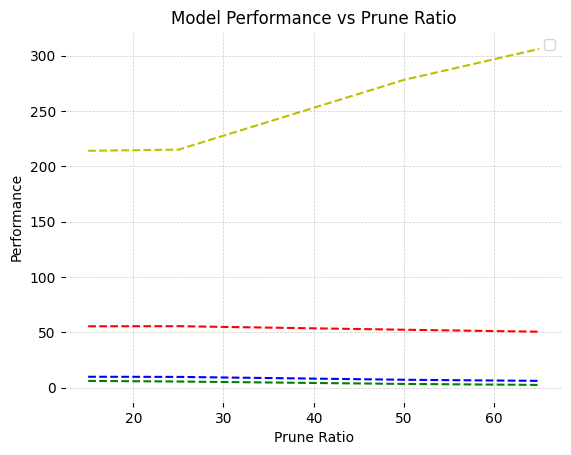

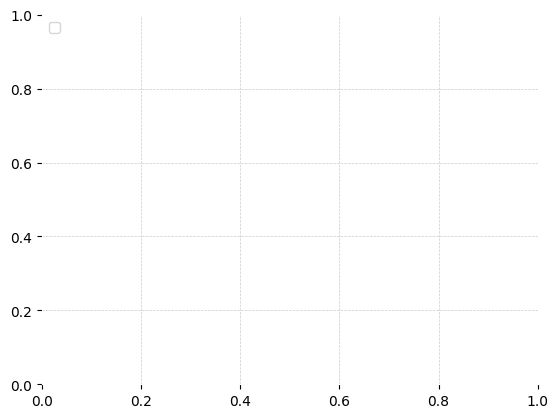

In [11]:
import matplotlib.pyplot as plt

# 数据及散点图...

# 添加折线
plt.plot(prune_ratios, map50, c='r', linestyle='--')
plt.plot(prune_ratios, params, c='g', linestyle='--')
plt.plot(prune_ratios, flops, c='b', linestyle='--')
plt.plot(prune_ratios, fps, c='y', linestyle='--')

# 不显示图例
plt.legend([], [])  

plt.xlabel('Prune Ratio')
plt.ylabel('Performance')

# 图表标题
plt.title('Model Performance vs Prune Ratio') 

# 绘图但不显示
plt.gcf().savefig('temp.png', dpi=300)

# 在图表外部添加图例
plt.figure()
plt.legend(['mAP50', 'Params', 'FLOPs', 'FPS'], loc='upper left')
plt.savefig('prune.png')

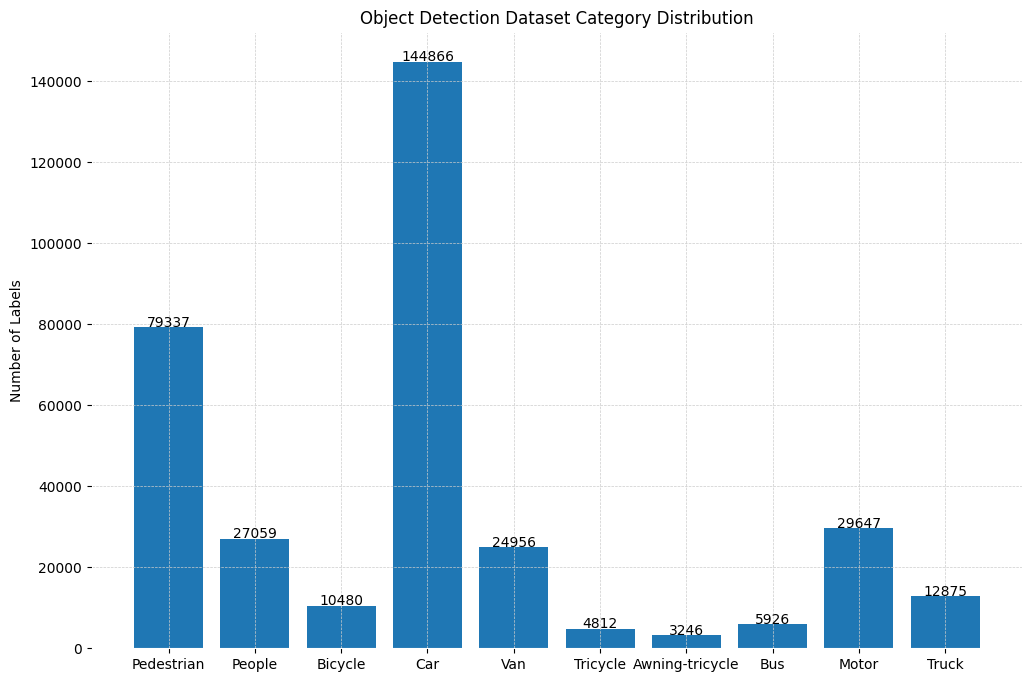

In [12]:
import matplotlib.pyplot as plt

labels = ['Pedestrian', 'People', 'Bicycle', 'Car', 'Van',
          'Tricycle', 'Awning-tricycle', 'Bus', 'Motor', 'Truck']  
sizes = [79337, 27059, 10480, 144866, 24956, 4812, 3246, 5926, 29647, 12875]

plt.figure(figsize=(12, 8))
plt.bar(labels, sizes)
plt.ylabel('Number of Labels')
plt.title('Object Detection Dataset Category Distribution')

# 在条形图上显示具体数量
for i, v in enumerate(sizes):
    plt.text(i, v+100, str(v), horizontalalignment='center')

plt.show()

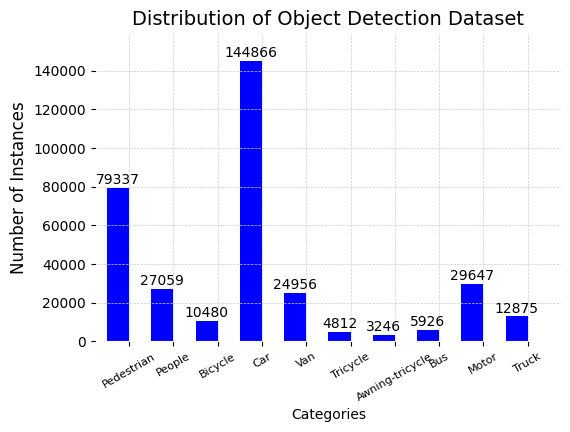

In [13]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
# matplotlib.use('svg')

save_dir = r'C:\Users\tinfengwu\Desktop\03_paper\03_paper_picutures'
# 使用Nature题图风格


# 设置图表大小
plt.figure(figsize=(6, 4))

# 条形图参数
bar_width = 0.5
index = np.arange(len(labels))

# 创建条形图
plt.bar(index, sizes, bar_width, color='b')

# x轴参数
plt.xlabel('Categories')
plt.xticks(index + bar_width/2, labels, fontsize=8, rotation=30)
plt.xlim(-0.5, len(index))

# y轴参数 
plt.ylabel('Number of Instances', fontsize=12)  
plt.ylim(0, max(sizes)*1.1)
plt.yticks(fontsize=10)

# 在条形图上显示数字
for i, v in enumerate(sizes):
    plt.text(i, v+2000, str(v), ha='center', fontsize=10)

# 图表标题
plt.title('Distribution of Object Detection Dataset', fontsize=14)  

# 保存为svg矢量图   
# plt.savefig(save_dir+'\distribution.svg', dpi=300)
plt.show()

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

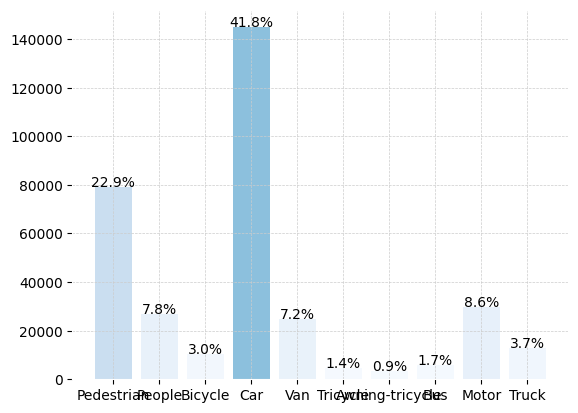

In [14]:
import matplotlib.pyplot as plt

# 数据
labels = ['Pedestrian', 'People', 'Bicycle', 'Car', 'Van',  
          'Tricycle', 'Awning-tricycle', 'Bus', 'Motor', 'Truck']
sizes = [79337, 27059, 10480, 144866, 24956, 4812, 3246, 5926, 29647, 12875]
total = 346456 # 总数

# 计算百分比  
percentages = [(size/total)*100 for size in sizes]

# 颜色映射图例
cmap = plt.cm.Blues
percents= [x / 100. for x in percentages]
colors = cmap(percents)

# 条形图 
plt.bar(labels, sizes, color=colors)

# 文本显示百分比
for i, v in enumerate(percentages):
    plt.text(i, sizes[i]+100, f'{v:.1f}%', ha='center')
    
# 颜色条图例    
plt.colorbar(ticks=[0, 25, 50, 75, 100])

plt.show()